# Disparity-Based Collision Avoidance System

### Deep Learning Project

Skoltech, Spring 2016

* _Anastasia Makarova_
* _Mikhail Usvyatsov_
* _Mikhail Karasikov_
* _Daniil Merkulov_


# Introduction

The goal of our project is to predict the distance to the nearest object on the road from a single image. Neural Networks are widely used in Advanced Driver Assistance Systems (ADAS) and this problem has direct application in Camera-Based Forward Collision Alert System. 

Ordinary, disparity map is built based on stereo pair and then camera parameters are neccessary for depth map building. 

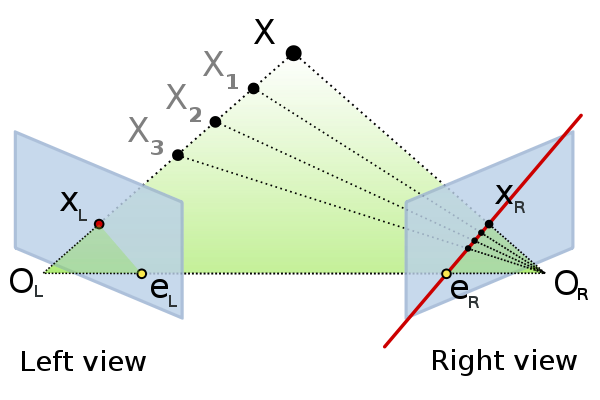

In [1]:
from IPython.display import Image
Image(filename='../../pics/pic.png')

We use semantic annotated data CityScapes and all intristic parameters are known, so the goal was to predict the robust maximum for disparity map, corresponded o the closest object on the road.

As we are interested only in objects on the way of the car, we work not only with the entire image, but also with its Region of Interest (RoI).

# Related work

There are several works related to the whole depth map prediction, based on Deep Learning. In 
$\textit{'Depth Map Prediction from a Single Image using a Multi-Scale Deep Network', 2015}$ 
authors consider two steps (coarse-scale and fine-scale) NN Structure. The task of the coarse-scale network is to predict the overall depth map structure using a global view of the scene. After taking a global perspective, local refinements are made by fine-scale network. 

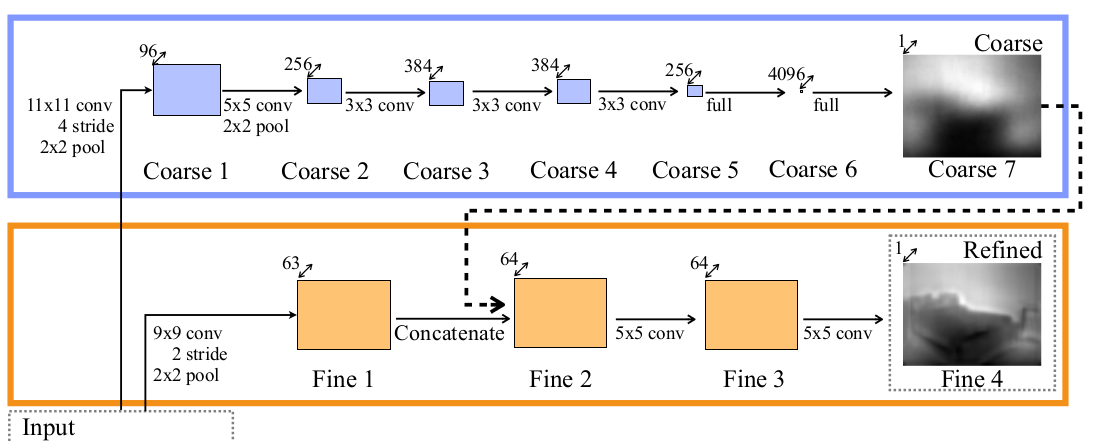

In [3]:
from IPython.display import Image
Image(filename='../../pics/struct.png')

The highly impressive result motivated us to use deep learning approaches for our task.

# Problem setting

MK

# Features as CNN output

We used VGG19 with reshaped input layer.
Next we deleted everything after the convolutional layer and used that as features for the next processing.
The structure of VGG19 that we used depictured further. <img src="./images/1.png" />
The result is a tensor of shape [512, 4, 9] raveled to the vector of length 18432.

# Classification

We applied different methods to solve classification problem.

## ANN

We tried the structure that follows the structure of VGG19. The difference was to add elu nonlinearities to all the dense layers.
The structure is the following:

DenseLayer - 2048 units + elu

DropoutLayer - 50%

DenseLayer - 2048 units + elu

DropoutLayer - 50%

DenseLayer - 1024 units + elu

DropoutLayer - 50%

DenseLayer - 512 units + elu

DropoutLayer - 50%

DenseLayer - 256 units + elu

DropoutLayer - 50%

DenseLayer - Softmax

First we tried to add these layers to output of VGG19 features leayers. The problem was that it required much higher amount of memory and we couldn't use batches even of size 50.
Next we used the described network as a separate classifier. It allowed us to use much higher batch sizes. 

Furthermore we faced the problem of overfitting. In order to deal with that we introduced l2 ans l1 regularizations to the loss.

Talking about loss it is impotrant to mention that we decided to use categorical_crossentropy as a loss function. It was motivated by the fact that we dealed with different sizes of classes (we started with binary classification problem and went to 4 classes classification).

We had to play with regularization weights. Increasing and decreasing it we could limit overfiting and imrpove the loss on validation set.

## Linear models

MK

# Conclusion

All